In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import re

%matplotlib inline

In [4]:
df = pd.read_csv('hw3.csv')#pd.read_csv('git-intro/UCB-MFE-python-preprogram/Homeworks/HW3/hw3.csv')

In the next block, I did some data cleaning work including droping duplicates,filling missing values,formating the token names.

In [5]:
#Drop duplicates
df = df.drop_duplicates()
#Fill NaN
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])
#Format Tokens
df.loc[df['token'].str.contains('</span>'), 'token'] = df.loc[df['token'].str.contains('</span>'), 'token'].str.extract('(?<=>)(.+)(?=<)').values
#Winsorize
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])
df.loc[df.open / df.close >= 2, 'close'] = 0.5 * (df.loc[df.open / df.close >= 2, 'high'] + df.loc[df.open / df.close >= 2, 'low'])


Since:
    
volumeUSD = volume * close


In [6]:
df['volumeUSD'] = df['volume'].values * df['close'].values

Then we visualize the cleaned data and plotted the volume of different chains.

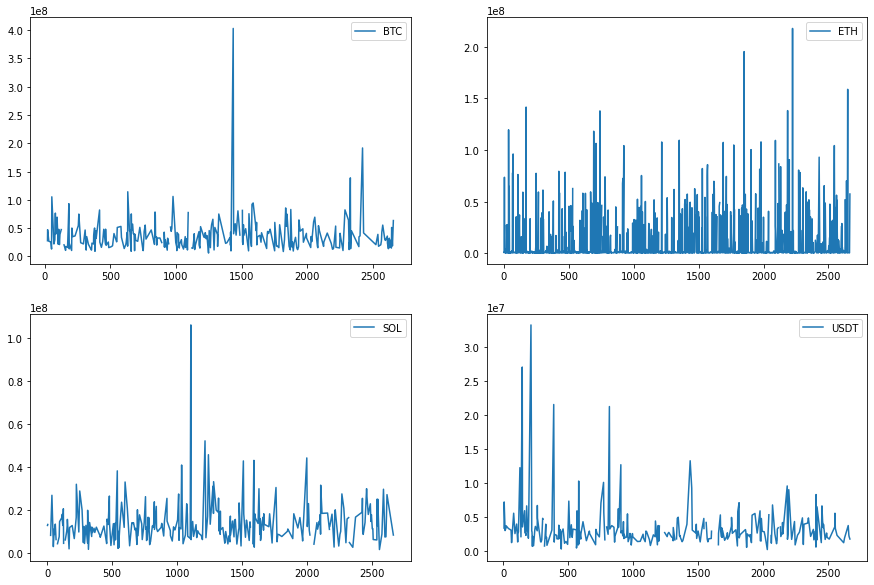

In [14]:
import math
chains_in_df = df.chain.unique()

fig, axes = plt.subplots(nrows=math.ceil(chains_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(chains_in_df.size / 2)))

idx = 0
for label, df_chain in df[['chain', 'volumeUSD']].groupby('chain'):
    df_chain['volumeUSD'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()  
    idx += 1

<AxesSubplot:>

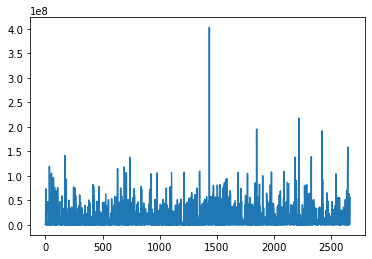

In [11]:
As we can observe from the plots above, 